# RFP: Betting on the Bachelor

## Project Overview
You are invited to submit a proposal that answers the following question:

### Who will win season 29 of the Bachelor?

*All proposals must be submitted by **1/15/25 at 11:59 PM**.*

## Required Proposal Components

### 1. Data Description
In the code cell below, read in the data you plan on using to train and test your model. Call `info()` once you have read the data into a dataframe. Consider using some or all of the following sources:
- [Scrape Fandom Wikis](https://bachelor-nation.fandom.com/wiki/The_Bachelor) or [the official Bachelor website]('https://bachelornation.com/shows/the-bachelor/')
- [Ask ChatGPT to genereate it](https://chatgpt.com/)
- [Read in csv files like this](https://www.kaggle.com/datasets/brianbgonz/the-bachelor-contestants?select=contestants.csv)

*Note, a level 5 dataset contains at least 1000 rows of non-null data. A level 4 contains at least 500 rows of non-null data.*

In [4]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('bachelor-contestants.csv' ,encoding='windows-1252')
df["Winner"] == 1

0       True
1      False
2      False
3      False
4      False
       ...  
574    False
575    False
576    False
577    False
578    False
Name: Winner, Length: 579, dtype: bool

### 2. Training Your Model
In the cell seen below, write the code you need to train a linear regression model. Make sure you display the equation of the plane that best fits your chosen data at the end of your program. 

*Note, level 5 work trains a model using only the standard Python library and Pandas. A level 5 model is trained with at least two features, where one of the features begins as a categorical value (e.g. occupation, hometown, etc.). A level 4 uses external libraries like scikit or numpy.*

     Job Number
0             1
1             2
2             3
3             1
4             4
..          ...
574          12
575          10
576          10
577          10
578           1

[579 rows x 1 columns]
0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
574    0.0
575    0.0
576    0.0
577    0.0
578    0.0
Name: Winner, Length: 579, dtype: float64
Slope (β1): 0.0010791089407160507
Intercept (β0): 0.02402448551759269


<AxesSubplot:xlabel='Job Number', ylabel='Winner'>

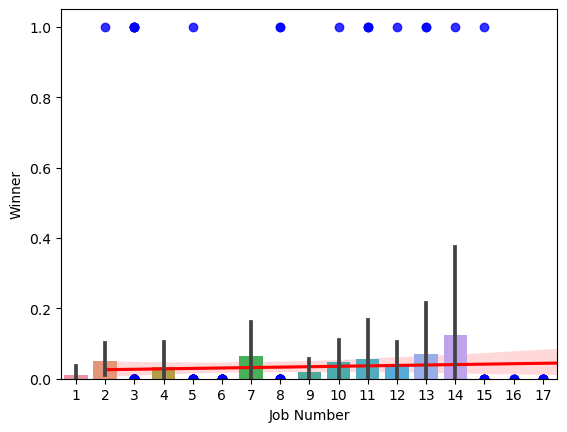

In [5]:
# Train model here.
# Don't forget to display the equation of the plane that best fits your data!
job = [df["Function"].unique()]
job_to_number = {
'Retail/Services/Entrepreneur': 1, 'Arts/Entertainment' : 2, 'Finance' : 3,
        'Student' : 4, 'Legal' : 5, 'Real Estate' : 6, 'Education' : 7, 'Restaurant' : 8,
        'Sales' : 9 , 'Medical' : 10, 'Marketing' : 11, 'Corporate' : 12, 'Transportation' : 13,
        'Government' : 14 , 'Agriculture' : 15 , 'Misc' : 16 , 'Journalist'  : 17
}

df['Job Number'] = df['Function'].map(job_to_number)
X = df[['Job Number']]
y = df['Winner'] 
print(X)
print(y)
n = len(X)

# Step 1: Calculate the necessary sums
n = len(X)  # Number of data points
sum_x = X['Job Number'].sum()  # Sum of all Job Numbers
sum_y = y.sum()  # Sum of all Winner values
sum_xx = (X['Job Number'] ** 2).sum()  # Sum of the squares of Job Numbers
sum_xy = (X['Job Number'] * y).sum()  # Sum of the product of Job Number and Winner

beta_1 = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x**2)
beta_0 = (sum_y - beta_1 * sum_x) / n
print(f"Slope (β1): {beta_1}")
print(f"Intercept (β0): {beta_0}")
sns.regplot(x='Job Number', y='Winner', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
sns.barplot(x= 'Job Number', y='Winner', data=df )


### 3. Testing Your Model
In the cell seen below, write the code you need to test your linear regression model. 

*Note, a model is considered a level 5 if it achieves at least 60% prediction accuracy or achieves an RMSE of 2 weeks or less.*

In [8]:
X = df['Job Number']
y_pred = pd.DataFrame(beta_0 + beta_1 * X, columns=["Job Number"])
why2 = []

for i in range(len(y_pred)):
    actual = df.loc[i, "Winner"] 
    predicted = y_pred.loc[i]
    s2 = (actual - predicted) ** 2
    why2.append(s2)
print(sum(why2))
print("MSE",(sum(why2)/len(why2)))
print("RMSE",(sum(why2)/len(why2)) ** .5 )

Job Number   NaN
dtype: float64
MSE Job Number   NaN
dtype: float64
RMSE Job Number   NaN
dtype: float64


### 4. Final Answer

In the first cell seen below, state the name of your predicted winner. 
In the second cell seen below, justify your prediction using an evaluation technique like RMSE or percent accuracy.

#### Kyleigh Henrich

#### i dont know byut based  on the graph done on my traning it showed that retal had the most arury above them.  she is a retal manger. this in not accrute as my model broke trying to calulate the winner so eather its so accrite that it right 100% of the time or it goes to inf and its wrong every time. i dont know hot make it output real dat but it broken chat gpt chould not help. 